
Se ajusta un modelo Word2Vec y se muestran resultados. Para esto:

1. Se construye un léxico utilizando los correspondientes métodos de tokenización y se ajusta un modelo Word2Vec para vectorizar los tokens incluidos en el léxico y que están presentes en el corpus.  

2. Se escogen 50 tókens del léxico y se grafican en un espacio 3D los vectores Word2Vec asociados a los tokens.

In [1]:
import pandas as pd
df = pd.read_csv(r'movie_reviews.csv', header=0)
df.columns = ['text', 'sent']
df

,text,sent
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
...,...,...
49995,"OK, lets start with the best. the building. al...",0
49996,The British 'heritage film' industry is out of...,0
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0


In [2]:
import re

def preprocesador(text):
    text = (re.sub('[\W]+', ' ', text.lower()))
    return text

df['text'] = df['text'].apply(preprocesador)
df.head(5)

,text,sent
0,in 1974 the teenager martha moxley maggie grac...,1
1,ok so i really like kris kristofferson and his...,0
2,spoiler do not read this if you think about w...,0
3,hi for all the people who have seen this wonde...,1
4,i recently bought the dvd forgetting just how ...,0


In [3]:
import nltk

corpus = df['text'].values.tolist()
tok_corp = [nltk.word_tokenize(sent) for sent in corpus]

In [ ]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(sentences = tok_corp, vector_size=100, window=5, min_count=1, workers=4, sg=1, alpha=0.001, epochs=10)
model.save('Word2VecSG')

In [4]:
import gensim

model = gensim.models.Word2Vec.load(r'Word2VecSG')
word_vectors = model.wv

words = list(word_vectors.index_to_key)
word_vectors['movie']
len(words)

101939

In [181]:
word_vectors['movie']

array([ 0.08688278,  0.2129172 , -0.00867774,  0.49740633, -0.63650554,
       -0.73353815,  0.50158405,  1.6384284 , -0.68300515, -0.9579035 ,
        0.39141986, -0.6091956 ,  0.18231285,  0.7746192 , -0.10874865,
       -0.36871845,  0.7310242 , -0.08865727, -0.5770879 , -1.3978127 ,
        0.19858772,  0.29177287,  0.6711933 , -0.5084817 , -0.20832422,
        0.3910867 , -0.4930056 ,  0.42132473, -0.5516665 ,  0.14746448,
        0.5666352 , -0.43550435,  0.67714363, -0.58855414, -0.6829831 ,
        1.0366849 ,  0.3274684 , -0.36021063, -0.84604913, -0.3214879 ,
        0.32542193, -0.1569308 , -0.4256385 ,  0.40242594,  0.4252708 ,
        0.24135886, -0.8481302 , -0.34622002,  0.35052133,  0.32408267,
       -0.13169396, -0.17316882, -0.25036326,  0.01641719, -0.406073  ,
       -0.20559904,  0.57204646, -0.27173817,  0.06878401,  0.2943111 ,
        0.10161057, -0.25942808,  0.63830507,  0.04697169, -0.5874261 ,
        0.9563941 , -0.3754083 ,  0.68512505, -1.1200634 ,  0.26

In [5]:
import numpy as np

x = word_vectors['movie']
print(np.min(x))
print(np.max(x))

-1.3978127
1.6384284


In [6]:
from random import randint as rand
test_words = [words[rand(0,5000)] for i in range(0,50)]
test_words[:10]

['down',
 'germans',
 'causes',
 '70s',
 'reputation',
 'rough',
 'charge',
 'china',
 'foul',
 'furthermore']

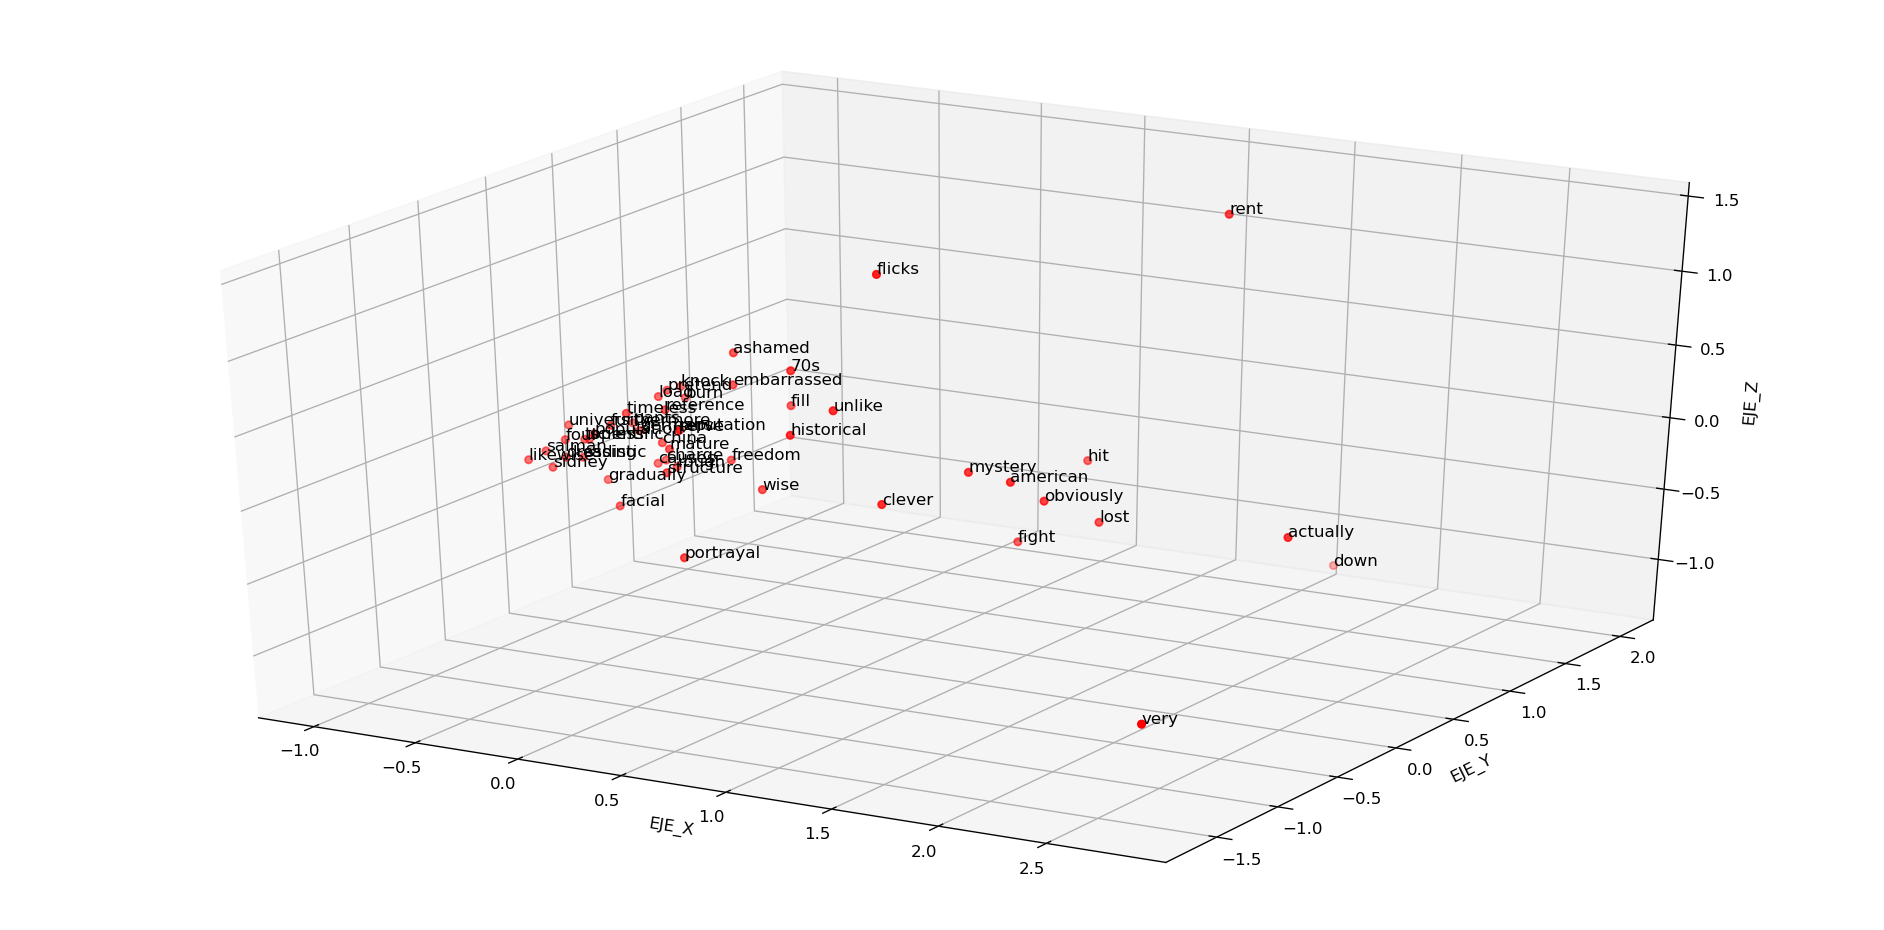

In [7]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

vectors = []
for w in test_words:
    vectors.append(word_vectors[w])

pca=PCA(n_components=3)
df3d=pd.DataFrame(pca.fit_transform(vectors),columns=list('xyz'))
x=df3d['x']
y=df3d['y']
z=df3d['z']

fig = plt.figure(figsize = (20, 10), dpi=120) 
ax = plt.axes(projection ="3d") 

ax.scatter3D(x, y, z, color = "red", marker='o')
ax.set_xlabel('EJE_X')
ax.set_ylabel('EJE_Y')
ax.set_zlabel('EJE_Z')

for i, w in enumerate(test_words):
    ax.text(x[i],y[i],z[i],w)
plt.show()


Ahora, se ajusta un modelo de clasificación para los documentos incluídos en la base de datos, Para esto:
1. Se separan los datos en un conjunto de entrenamiento y un conjunto de testeo de la forma que estime conveniente. Se vectoriza cada uno de los documentos pertenecientes a los conjuntos antes mencionados, con el modelo Word2Vec obtenido.
2. Se ajusta un clasificador basado en una Red Convolucional o en una Red Recurrente, a partir de los datos del conjunto de entrenamiento. Se obtiene la matriz de confusión para los datos del conjunto de testeo, a partir de la clasificación entregada por el modelo obtenido.


In [8]:
print(sum(df.sent),len(df))

25000 50000


In [9]:
def tokenizar_y_vectorizar(dataset):
    vectorized_data = []
    for sample in tok_corp:
        vectors = [word_vectors[w] for w in sample if w in word_vectors.index_to_key]
        vectorized_data.append(vectors)
    return vectorized_data

In [41]:
X = tokenizar_y_vectorizar(df.text)

In [42]:
Xt = []
for i in range(0,len(df)):
    X[i] = np.array(X[i])
    Xt.append(np.matrix.transpose(X[i]))

In [164]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(X, df.sent, 
                                                   test_size=0.3, random_state=1234, stratify=df.sent)

In [165]:
np.shape(x_train[10]),np.shape(x_test[40])

((120, 100), (53, 100))

In [182]:
#HIPERPARAMETROS
maxlen = 100
batch_size = 32
embedding_dims = 100
hidden_dims = 100
kernel_size = 3
epochs = 1
dropout = 0.4
lr = 0.01

In [167]:
def pad_trunc(data, maxlen):
    new_data = []
    zero_vector = []
    for _ in range(len(data[0][0])):
        zero_vector.append(0.0)        
    for sample in data:
        if len(sample) > maxlen:
            temp = sample[:maxlen]
        elif len(sample) < maxlen:
            temp = list(sample)
            additional_elems = maxlen - len(sample)
            for _ in range(additional_elems):
                temp.append(zero_vector)
        else:
            temp = sample
        new_data.append(temp)
    return new_data

x_train = pad_trunc(x_train, maxlen)
x_test = pad_trunc(x_test, maxlen)

In [168]:
np.shape(x_train[10])

(100, 100)

In [169]:
from tensorflow.keras.utils import to_categorical

num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train,num_labels)
y_test = to_categorical(y_test,num_labels)

y_train = np.array(y_train)
y_test = np.array(y_test)

input_shape = (maxlen, embedding_dims, 1)
input_shape

(100, 100, 1)

In [174]:
mini = np.min(x_train)
maxi = np.max(x_train)
x_train = (np.array(x_train).astype('float16') - mini) / (maxi - mini)
x_test = (np.array(x_test).astype('float16') - mini) / (maxi - mini)

In [175]:
np.min(x_train) , np.max(x_train)


(0.0, 1.0)

In [176]:
np.shape(x_train), np.shape(x_train[0])

((35000, 100, 100), (100, 100))

In [183]:
x_train = x_train.reshape(len(x_train),100,100)
x_test = np.array(x_test).reshape(len(x_test),100,100)


In [184]:
np.shape(x_train)

(35000, 100, 100)

In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Flatten, Conv1D, GlobalMaxPooling1D
from tensorflow.keras import optimizers

optimizer = optimizers.Adam(learning_rate=lr, decay=6e-8)

model = Sequential()

model.add(Conv1D(100, kernel_size, padding='valid', activation='relu', strides=1, 
                 input_shape=input_shape))
model.add(Dropout(dropout))
model.add(Conv1D(1, kernel_size, padding='valid', activation='relu', strides=1))
model.add(Flatten())
model.add(Dense(hidden_dims))
model.add(Dropout(dropout))
model.add(Activation('relu'))
model.add(Dense(num_labels, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_34 (Conv1D)           (None, 100, 98, 100)      400       
_________________________________________________________________
dropout_20 (Dropout)         (None, 100, 98, 100)      0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 100, 96, 1)        301       
_________________________________________________________________
flatten_2 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               960100    
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
activation_12 (Activation)   (None, 100)             

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))